Look at outliers, are they plausible?


## COMP5721M: Programming for Data Science

## Group project (Coursework 2): Data Analysis Project


# Predictive Analysis of Heart Attack Risk Using Machine Learning Algorithms

Group member names
* Rajvi Rajesh Jagani, qjth6630@leeds.ac.uk
* Stan Kilburn, kmgc7321@leeds.ac.uk
* Zaid Rupani, rtgw1267@leeds.ac.uk
* Bhargav Kumar Nath, vnnh7247@leeds.ac.uk

# Project Plan

## The Data (10 marks)
### Dataset Overview
The **Heart Failure Prediction** dataset, available on Kaggle, is a critical resource for researchers and practitioners in the healthcare field, focusing on cardiovascular diseases (CVDs), which remain the leading cause of death worldwide, claiming approximately 17.9 million lives annually. Among these, heart failure is a prevalent outcome that necessitates early detection and intervention, especially for individuals at high cardiovascular risk due to factors like hypertension, diabetes, and hyperlipidaemia. This dataset comprises 11 features, making it a valuable tool for developing machine learning models to predict heart disease.

### Context and Importance
Given the alarming statistics surrounding cardiovascular diseases where four out of five deaths result from heart attacks and strokes, it is vital to use advanced analytical techniques for early diagnosis and management. The Heart Failure Prediction dataset facilitates this need by providing comprehensive data that can aid in identifying individuals who may be at risk of heart failure, therefore enhancing preventive healthcare measures.

### Attribute Information
The dataset includes the following key attributes:

- **Age**: Age of the patient in years.
- **Sex**: Gender of the patient (M: Male, F: Female).
- **ChestPainType**: Classification of chest pain (e.g., Typical Angina, Atypical Angina, Non-Anginal Pain, Asymptomatic).
- **RestingBP**: Resting blood pressure in mm Hg.
- **Cholesterol**: Serum cholesterol levels in mg/dl.
- **FastingBS**: Fasting blood sugar levels (1: if fasting blood sugar > 120 mg/dl, 0: otherwise).
- **RestingECG**: Results of a resting electrocardiogram (Normal, ST abnormality, LVH).
- **MaxHR**: Maximum heart rate achieved (numerical value between 60 and 202).
- **ExerciseAngina**: Indicates exercise-induced angina (Y: Yes, N: No).
- **Oldpeak**: Measurement of ST segment depression.
- **ST_Slope**: Slope of the peak exercise ST segment (Up, Flat, Down).
- **HeartDisease**: Output class indicating the presence of heart disease (1: heart disease, 0: normal).

### Source
The dataset is notable for being a total integration of five independent heart disease datasets, which collectively offer a robust sample size. These datasets include:

- Cleveland (303 observations)
- Hungarian (294 observations)
- Switzerland (123 observations)
- Long Beach VA (200 observations)
- Stalog (Heart) Data Set (270 observations)

In total, the combined dataset contains **1190 observations**, with **272 duplicates** removed, resulting in a final dataset of **918 observations**.

### Citation
The dataset was created with contributions from various medical institutions and professionals, emphasizing the collaborative effort behind its compilation. For further reference, the dataset can be cited as follows:

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved from [Kaggle Link](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

### Acknowledgements

Creators:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

By utilizing this dataset, we can contribute significantly to understanding and predicting heart failure, ultimately advancing patient care and treatment outcomes.


## Project Aim and Objectives (5 marks)

The aim of this data analysis project is to develop and compare 4 different Machine Learning algorithms that will use measurements of different factors relating to a patient's health, to assign a label 0 or 1, indicating whether or not that patient has heart disease.

We hope to provide several reliable, data-driven approaches to predicting heart disease, that could be used confidently by healthcare professionals. We also discuss the limitations of our analyses, which presents opportunities to further optimise our results in the future.

We will provide a detailed comparison of the performance of each machine learning algorithm, using different metrics and visualisations. Beyond this we will also consider the context, and explore the advantages and disadvantages of using each model within this particular healthcare field.

Each algorithm will train a model using a subset of the original data set, and then we will measure performance on a smaller test data set, that is unseen to the model. We will ensure fairness in our project comparisons through using identical testing and training data sets - this will allow us to really see the key differences between models.


### Specific Objectives



1. **Objective 1:** Conduct exploratory data analysis to examine dataset structure, identify duplicates, assess data distribution and balance, visualize relationships, and analyze categorical variables, correlations, and outliers. This will ensure the dataset is well-prepared for accurate and reliable model training.

2. **Objective 2:** Develop a Random Forest model using Scikit-learn's RandomForestClassifier, evaluate its performance through a confusion matrix and classification report, and visualize feature importance and other key metrics.

3. **Objective 3:** Build a logistic regression model using sci-kit learn's LogisticRegression.

4. **Objective 4:** Build a support vector machine.

5. **Objective 5** Build a __

6. **Objective 6** Compare all the machine learning models and check which one works the best in predicting the heart disease.

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._

### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them.
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given,
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Data exploration

In this section we will explore the dataset using various libraries like numpy and pandas. 

In [1]:
# importing necessary libraries with the import statement
# numPy provides efficient numerical operations on arrays, while pandas offers data structures and tools for data manipulation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file 'heart.csv' into a Pandas DataFrame
df = pd.read_csv("heart.csv")

# Randomly sample 10 rows from the DataFrame and display them. We made it random for more unbiased and representative view compared to head()
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
676,51,F,ASY,130,305,0,Normal,142,Y,1.2,Flat,1
723,59,M,ASY,140,177,0,Normal,162,Y,0.0,Up,1
252,61,M,ASY,125,292,0,ST,115,Y,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
587,37,M,NAP,118,240,0,LVH,165,N,1.0,Flat,0
138,54,M,ASY,140,166,0,Normal,118,Y,0.0,Flat,1
581,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
749,54,M,NAP,150,232,0,LVH,165,N,1.6,Up,0
573,72,M,ASY,160,123,1,LVH,130,N,1.5,Flat,1
446,54,M,ASY,130,0,0,ST,117,Y,1.4,Flat,1


From the above dataframe we can see that we have 7 numerical and 5 categorical values.

In [3]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The DataFrame df has 918 rows and 12 columns. It contains both numerical and categorical data, and there are no missing values.

In [4]:
# Summary for numerical columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Summary for categorical columns
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
# Checking for duplicates
duplicates = df.duplicated().sum()

print(f"Number of rows: {duplicates}")

Number of rows: 0


It shows we don't have any duplicates

## Data distribution and value counts


In [7]:
# View unique values and their counts for categorical columns
for col in df.select_dtypes(include=object).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

# Check distribution of the target variable
print("Target value distribution")
print(df["HeartDisease"].value_counts())

Value counts for Sex:
Sex
M    725
F    193
Name: count, dtype: int64


Value counts for ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Value counts for RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


Value counts for ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


Value counts for ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


Target value distribution
HeartDisease
1    508
0    410
Name: count, dtype: int64


The dataset is imbalanced, with more instances of the majority class (HeartDisease=1). Most individuals are male, and the majority experience typical chest pain (ASY). Resting ECG results vary, with 'Normal' being the most common. Exercise-induced angina is present in a significant portion of individuals. The ST slope is predominantly flat.

## Data Visualisation

In [8]:
def plot_feature_distributions(df, num_cols=4):
    """
    Generates distribution plots for numeric features in a DataFrame using seaborn.

    This function creates a grid of histogram plots with kernal density estimation
    for all numeric columns in the input DataFrame. The plots are arranged in a
    grid layout with customizable spacing and formatting.

    Args:
        df (pandas.DataFrame): Input DataFrame containing the data to visualize
        num_cols (int, optional): Number of columns in the plot grid.

    Returns:
        None. It displays the plot using matplotliv.pyplot.show()
    """
    cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    num_rows = (len(cols) - 1) // num_cols + 1

    # Create a figure with the calculated dimensions
    fig, axes = plt.subplots(num_rows, num_cols - 1, figsize=(15, 6 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    # Enumerate through columns and create histogram on each subplot
    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")

    # Hide unused subplots (we only need 7 plots)
    for i in range(len(cols), len(axes)):
        fig.delaxes(axes[i])

    # Fine-tune spacing between subplots for better readability
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.3, hspace=0.3)
    plt.show()

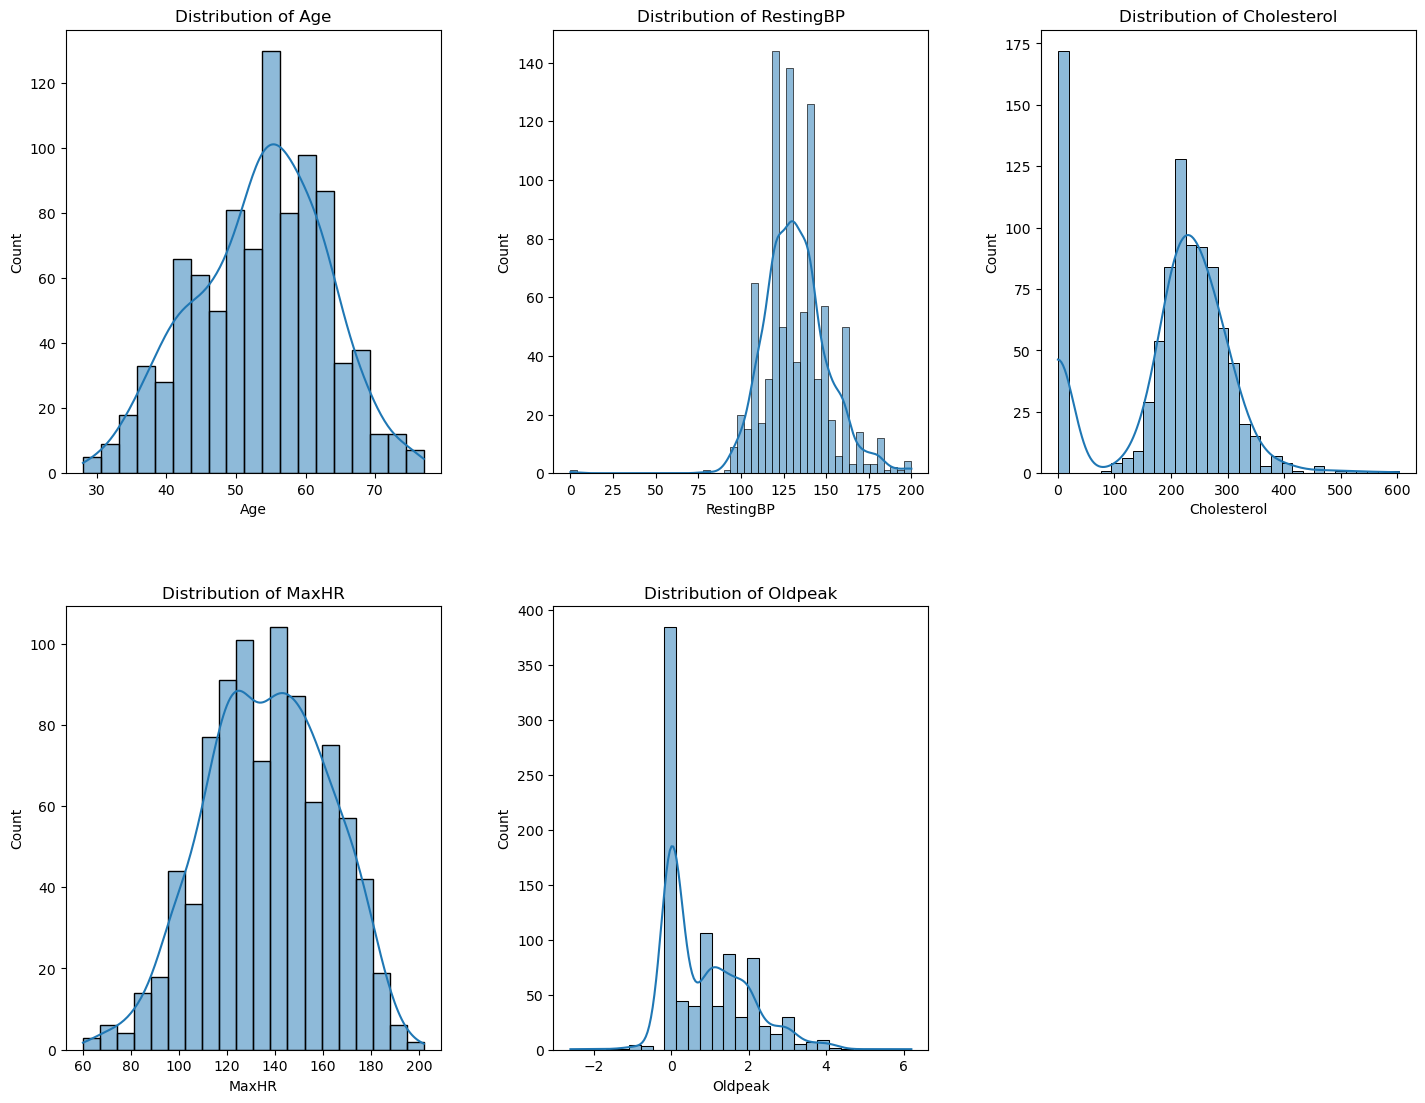

In [9]:
plot_feature_distributions(df)

Looking at these distributions, the Age distribution is approximately normal, with most individuals in the 50–60 range. RestingBP shows a slightly right-skewed distribution, centered around 120 mmHg. Cholesterol has a highly right-skewed distribution, with many individuals having lower cholesterol values, but a few outliers at higher levels. MaxHR displays a normal distribution, peaking around 125–145 bpm. Oldpeak, is right-skewed, with most values close to zero and few higher outliers, indicating varying levels of cardiac stress. These visualizations highlight the need for outlier handling and normalization in certain features.

To explore the categorical variables, we return to the value counts. We will create some countplots to visualise the potential problems in the balance of our data set.

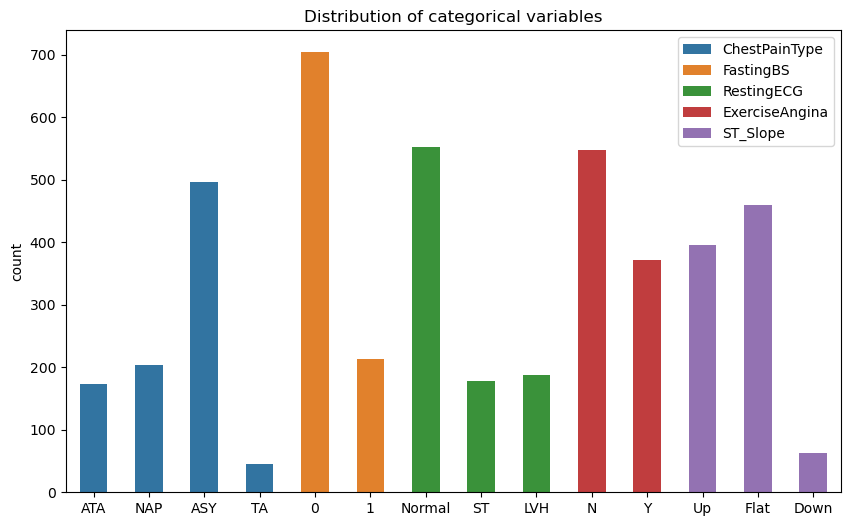

In [10]:
catcols = ['ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
plt.figure(figsize=(10, 6))
for col in catcols:
    fig = sns.countplot(df,
                 x=col, width = 0.5)
    fig.set_title(f"Distribution of categorical variables")

plt.legend(['ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'])  
fig.set_xlabel('')
plt.show()


The bar chart shows the distribution for the categorical values. For ChestPainType, the ASY (asymptomatic) category dominates followed by NAP (non-anginal pain) and ATA (Atypical Angina), with TA (typical angina) being the least frequent. FastingBS is highly skewed with majority having 0, indicating normal blood pressure. RestingECG shows that Normal is the most frequent category, followed by LVH and ST. ExerciseAngina shows a higher count for N compared to Y. ST_Slope is dominated by Flat, followed by Up, and very few instances of Down. 

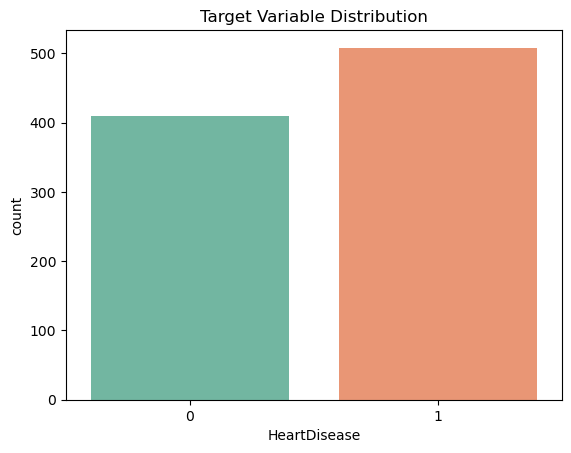

In [11]:
# Count plot for the target variable
sns.countplot(data=df, x="HeartDisease", hue="HeartDisease", palette="Set2", legend=False)
plt.title("Target Variable Distribution")
plt.show()

The target variable (HeartDisease) distribution shows a fairly balanced dataset with a slight majority of positive cases (value 1). Out of approximately 900 total samples, around 500 patients have heart disease while about 400 do not. This near-balanced distribution is favorable for machine learning modeling as it reduces the need for sampling techniques to handle class imbalance.

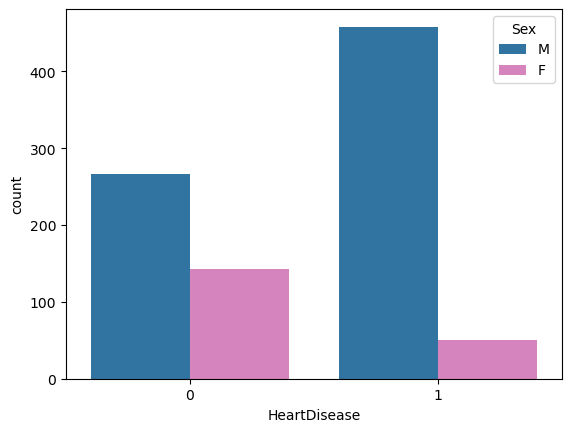

In [12]:
s = sns.color_palette("tab10")

sns.countplot(data=df,hue="Sex",x="HeartDisease",palette=[s[0],s[6]])
plt.show()

This plot shows the number of males and females in each heart disease category. We see that for healthy patients, we have alot more males than females. We also see that there are very few females with heart disease in our data, these two features may cause concerns on the validity of the machine learning models we create in this project.

In [ ]:
# Now we are categorising ages into discrete bins, grouping by age and heart status, and aggregating the counts for each group.
dfage = df.assign(box_age=pd.cut(df["Age"],
                         bins=[0,18,30,45,55,100])).loc[:,["box_age","HeartDisease"]].assign(count_pointer=1).groupby(["box_age","HeartDisease"]).agg(count_num=("count_pointer","count"))
dfage = dfage.reset_index()



C:\Users\bharg\AppData\Local\Temp\ipykernel_11312\1058680145.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins=[0,18,30,45,55,100])).loc[:,["box_age","HeartDisease"]].assign(count_pointer=1).groupby(["box_age","HeartDisease"]).agg(count_num=("count_pointer","count"))


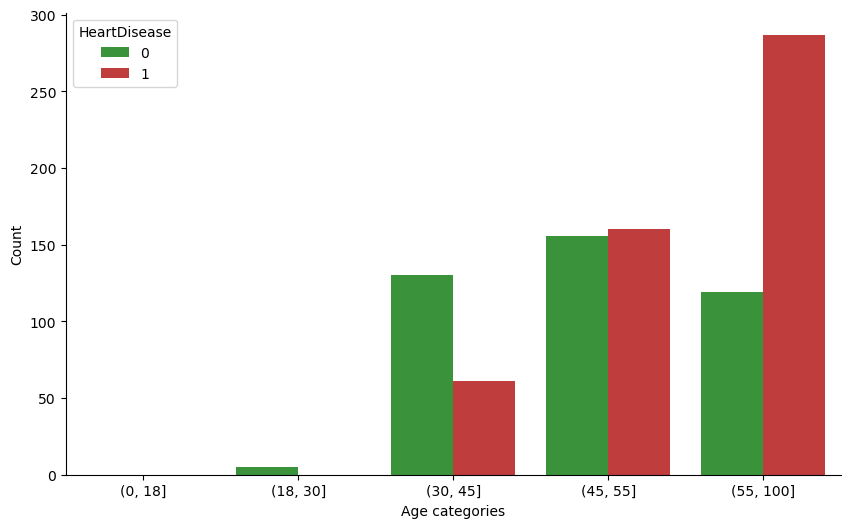

In [14]:
plt.figure(figsize=(10,6))
s1 = sns.color_palette("tab10")
fig =sns.barplot(x=dfage["box_age"],y=dfage["count_num"],hue=dfage["HeartDisease"],palette=[s[2],s[3]])
fig.set_xlabel('Age categories')
fig.set_ylabel('Count')
sns.despine()

As we'd expect, the proportion of heart disease cases increases as age does, suggesting older patients are more likely to have heart disease. From this plot We also see our data has lots of patients over the age of 55 with heart disease, which may also affect the validity of our machine larning models, as it will be less trained in predicting heart disease in younger patients.

## Correlation Matrix

Now we will create a correlation matrix, which will check feature correlations to identify relationships and potential multicollinearity.

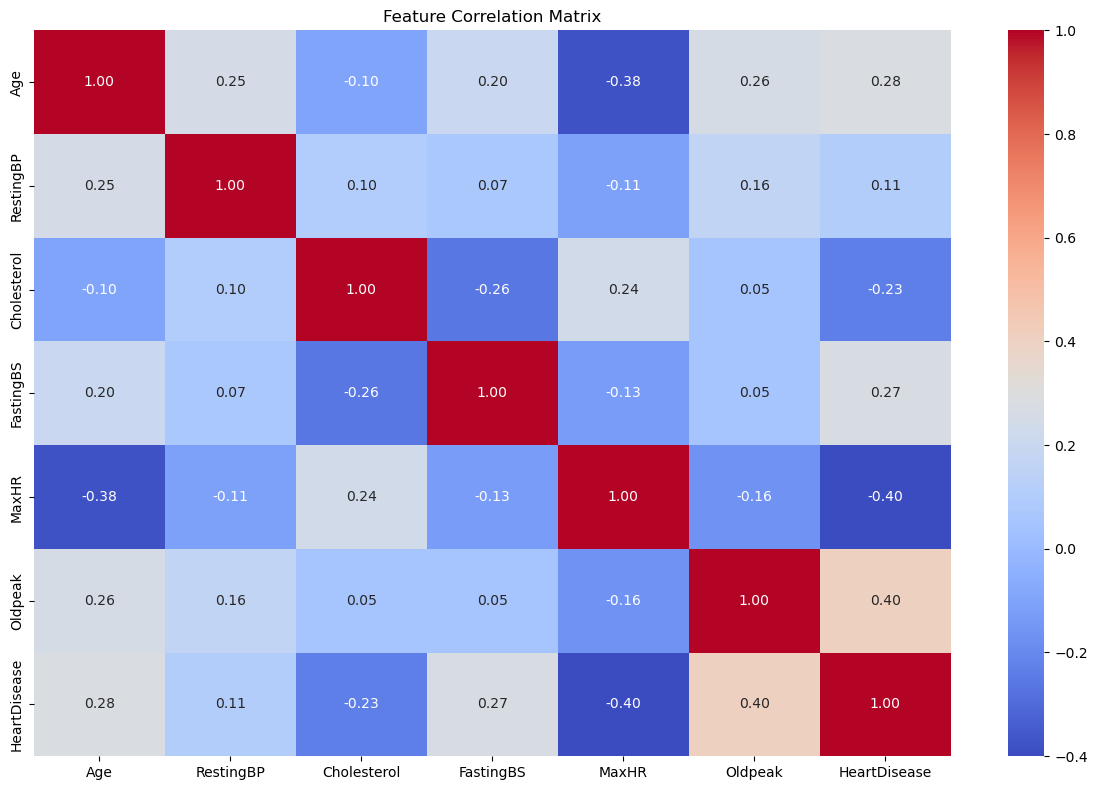

In [15]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=["number"])

# Correlation matrix
plt.figure(figsize=(12, 8))     # fig size
sns.heatmap(numeric_df.corr(),  # Calculate correlation matrix
            annot=True,         # Display correlation values within cells
            cmap="coolwarm",    # Color scheme
            fmt=".2f")          # formatting the values to 2 decimal places
plt.title("Feature Correlation Matrix")     # Setting the title
plt.tight_layout()                          # Ensure proper scaping around plot
plt.show()                      # Display the plot

The correlation matrix reveals several important relationships with heart disease. The strongest correlations are with MaxHR (-0.40, negative correlation suggesting lower maximum heart rates are associated with heart disease), and Oldpeak (0.40, positive correlation indicating higher ST depression relates to increased heart disease risk). Age shows a moderate positive correlation (0.28) with heart disease, while cholesterol surprisingly shows a weak negative correlation (-0.23). FastingBS and RestingBP have weak positive correlations. Most features show relatively low correlation with each other, indicating minimal multicollinearity, which is favorable for modeling. Age and MaxHR have a notable negative correlation (-0.38), suggesting maximum heart rate decreases with age as expected biologically.

## Outlier Detection


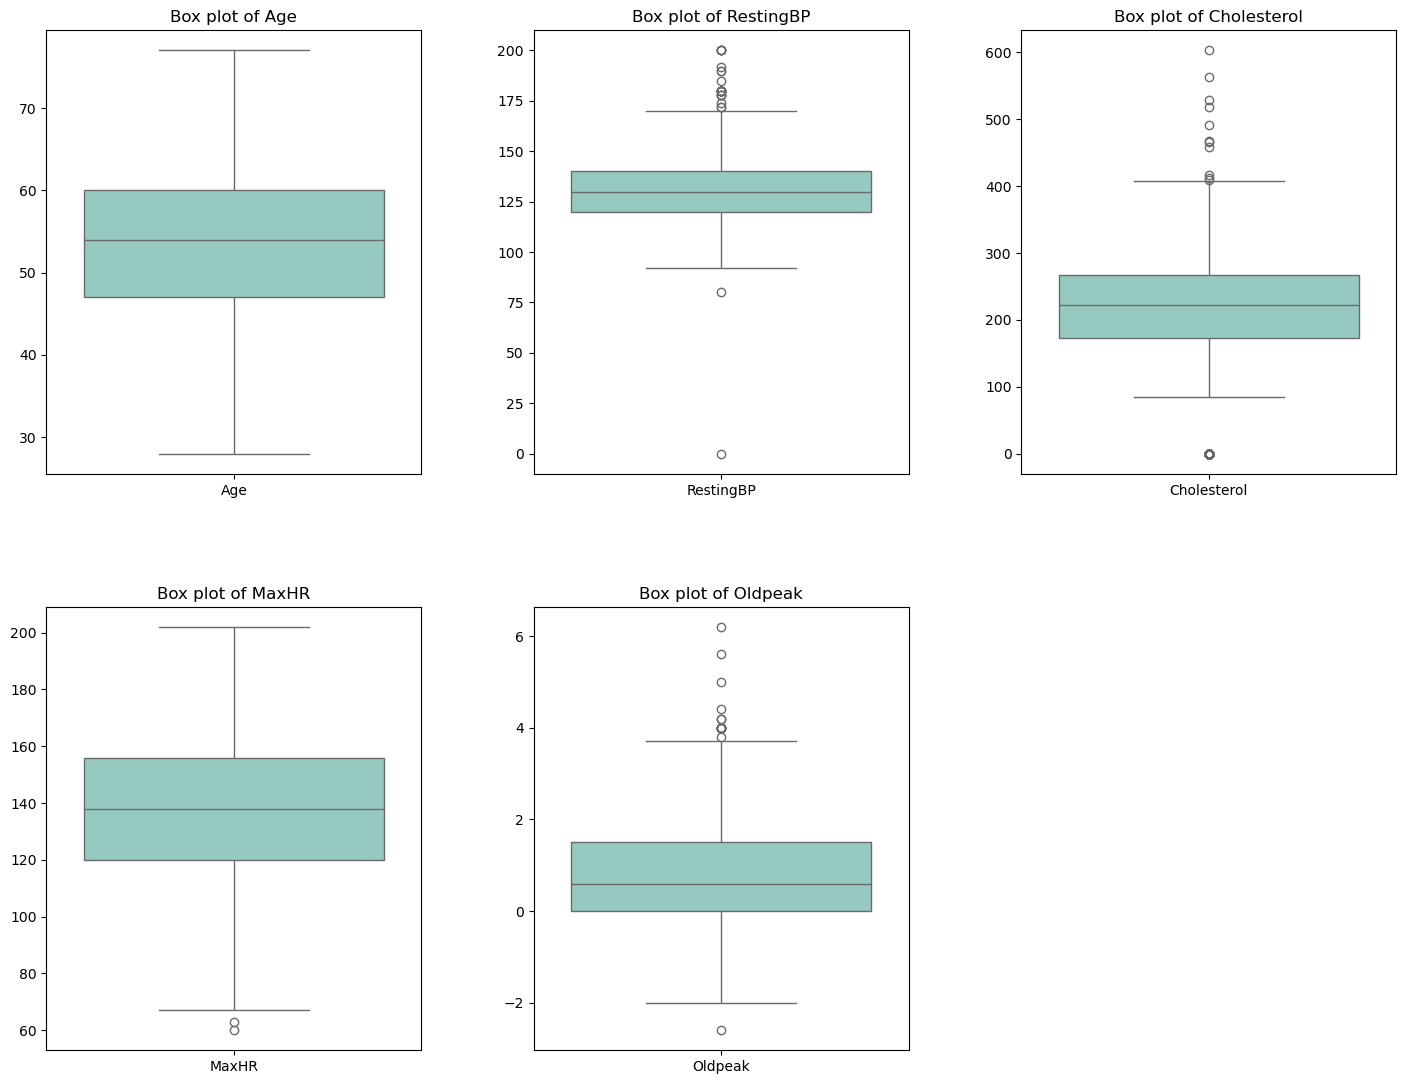

In [16]:
# Now we will use boxplot for each numerical feature

# Select numerical columns for boxplots
cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Define subplots grid dimensions
num_cols = 4
num_rows = (len(cols) - 1) // num_cols + 1      # Number of rows in subplot grid

# Create subplot figure with specified dimensions
fig, axes = plt.subplots(num_rows, num_cols-1, figsize=(15, 6 * num_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Enumerate through columns and create boxplots on each subplot
for i, col in enumerate(cols):
    sns.boxplot(data=df[[col]], ax=axes[i],
                palette="Set3")
    axes[i].set_title(f"Box plot of {col}")

# Remove unused subplots
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])


# Fine-tune spacing between subplots for better readability
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.3, hspace=0.3)

plt.show()


Age is centered around 54 years with most patients between 47-60 years. RestingBP shows a median around 130mmHg with several high outliers above 175mmHg. Cholesterol has a median near 230mg/dL with multiple outliers above 500mg/dL. MaxHR is normally distributed around 140bpm with few outliers. Oldpeak shows the median near 0.8 and multiple outliers above 4.0. There are notable outliers in RestingBP and Cholesterol that might need attention during preprocessing. 

# Machine Learning Algorithms

Now we will start implementing our Machine Learning algorithms. Each of us will take one algorithm and we will check the accuracy for each one

# 1. Random Forest Algorithm

Random Forest Algorithm is a machine learning model that aggregates numerous decision trees to enhance accuracy, reduce bias and optimize complex data analysis. It's effective for both classification and regression problems.

**Key Points:**

* **Ensemble Learning:** Random Forest uses an ensemble approach, meaning it combines multiple decision trees to make a final prediction.
* **Decision Trees:** Each decision tree in the forest makes independent decisions based on the data and features.
* **Randomness:** Randomness is introduced in two ways:
    * **Bootstrap Aggregation (Bagging):** Each tree is trained on a random sample of the data with replacement.
    * **Feature Randomness:** At each node of a tree, a random subset of features is considered for splitting.
* **Prediction:** For classification, the most common class among the trees' predictions is chosen. For regression, the average of the tree's predictions is used.

**Advantages:**

* **Accuracy:** Random Forest often achieves high accuracy due to its ensemble nature.
* **Robustness:** It's less prone to overfitting compared to single decision trees.
* **Feature Importance:** It can provide insights into the importance of different features in the data.
* **Versatility:** It can handle both numerical and categorical data.

**Disadvantages:**

* **Complexity:** Random Forest models can be complex and computationally expensive to train.
* **Interpretability:** The ensemble nature can make it difficult to interpret individual predictions.

In [17]:
# Now we seperate features and the target variable
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [18]:
# Encode binary categorical variables
# We are importing LabelEncoder from sklearn for this process
from sklearn.preprocessing import LabelEncoder

binary_columns = ["Sex", "ExerciseAngina"]
label_encoder = LabelEncoder()

for column in binary_columns:
    X[column] = label_encoder.fit_transform(X[column])

Above code converts categorical binary columns ("Sex" and "ExerciseAngina") in a DataFrame X into numerical values (0 and 1)

In [19]:
# One-hot encode for multi-category categorical variables
X = pd.get_dummies(X, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True)

We can see that ChestPainType, RestingECG and ST_Slope has categorical data. That's why we did one-hot encode to convert categorical data to numerical data so that our model can process the data more easily.  

In [20]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,False,False,True,True,False,True,False
914,68,1,144,193,1,141,0,3.4,False,False,False,True,False,True,False
915,57,1,130,131,0,115,1,1.2,False,False,False,True,False,True,False
916,57,0,130,236,0,174,0,0.0,True,False,False,False,False,True,False


Now we can see our dataset has all numerical values. Which means now we can start working on our model

In [21]:
# Now we will split the data to train and test using the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Here we are dividing our dataset into train and test splits. After training our data on train dataset we will test it on our test dataset. Here we are training 80% of the dataset and we will test it on rest which is 20% of the dataset. Here ``X_train``, ``X_test``, ``y_train``, ``y_test`` represent training and testing datasets, where:
``X_train`` and ``y_train`` (80% of data) are used for model training,
``X_test`` and ``y_tes``t (20% of data) are used for evaluating model performance.

In [22]:
# Initialize and train the model we
# Import the randomForestClassifier from scikitlearn module
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

One important to note here is that we have selected ``random_seed=123`` because of reproducibility or we will be getting different accuracy everytime we run the model

## Now we can evaluate the model

In [23]:
# We are calculating the model's accuracy on test data using the .score()
test_score = rf_model.score(X_test, y_test)

# Print test accuracy with 4 decimal places
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.8641


Our Random Forest model got an accuracy of ``0.8641%``

## Confusion Matrix for Random Forest

<Figure size 800x600 with 0 Axes>

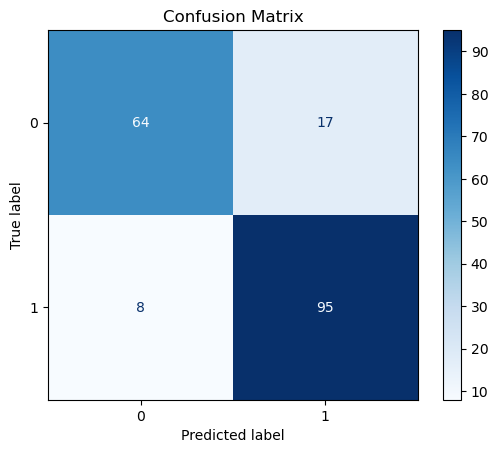

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for test data
y_pred = rf_model.predict(X_test)

# Create confusion matrix comparing true labels and predictions
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))  # Initialize plot with specified size
ConfusionMatrixDisplay(cm).plot(cmap="Blues")   # We have plot the confusion matric with color blue
plt.title("Confusion Matrix")
plt.show()

* **True Positives (95)**: Correctly identified heart disease cases.
* **True Negatives (64)**: Correctly identified non-heart disease cases.
* **False Positives (17)**: Non-heart disease cases incorrectly classified as heart disease.
* **False Negatives (8)**: Heart disease cases missed by the model.

The model is effective in detecting heart disease with high true positives and low false negatives, but it has some tendency for false positives, leading to a moderate over-prediction of heart disease.

## Classification Report for Random Forest

In [25]:
from sklearn.metrics import classification_report

# Predict labels for test data
y_pred = rf_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"])
print(report)

                  precision    recall  f1-score   support

No Heart Disease       0.89      0.79      0.84        81
   Heart Disease       0.85      0.92      0.88       103

        accuracy                           0.86       184
       macro avg       0.87      0.86      0.86       184
    weighted avg       0.87      0.86      0.86       184



* Precision: 89% for No Heart Disease, 85% for Heart Disease.
* Recall: 79% for No Heart Disease, 92% for Heart Disease.
* F1-score: Balanced performance with 0.84 for No Heart Disease and 0.88 for Heart Disease.
* Accuracy: Overall 86%.
* Macro avg: Indicates balanced performance across classes.
* Weighted avg: 86%, confirming strong overall accuracy.

Hence, this model shows strong performance as it has high recall and F1-score.

## Feature Importance Plot

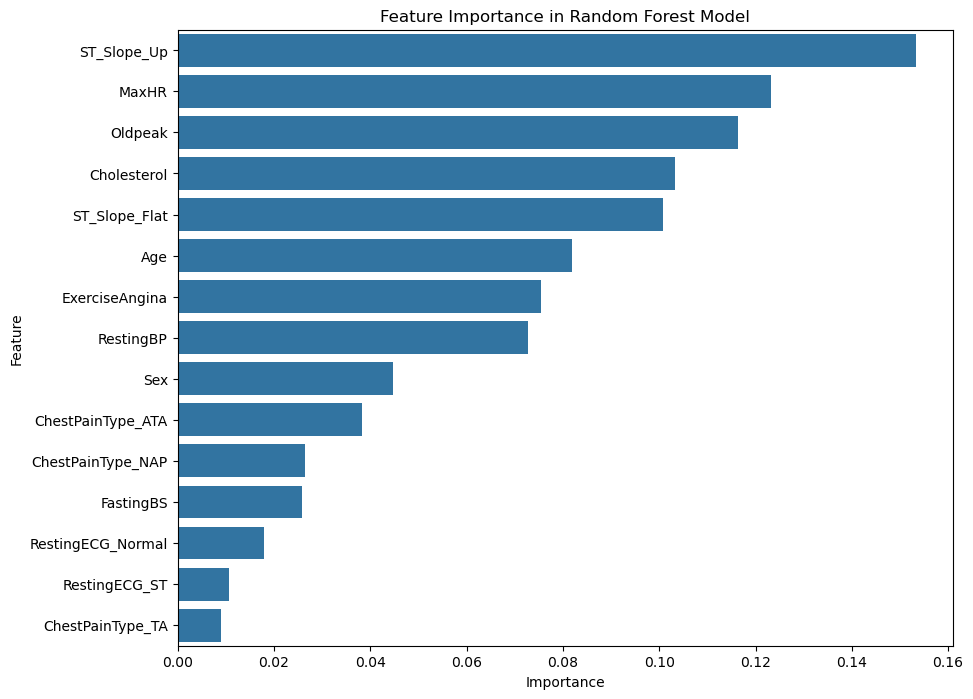

In [26]:
# Extract feature importances from Random Forest model
feature_importances = rf_model.feature_importances_

# Get feature names from DataFrame
features = X.columns

# Create DataFrame with feature names and importances
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})

# Sort DataFrame by importance in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Initialize plot with specified size
plt.figure(figsize=(10, 8))

# Plot feature importances as a bar chart
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in Random Forest Model")
plt.show()

From the above feature importance plot figure we can say that Random Forest model shows that `ST_Slope_Up` is the most influential feature in predicting heart disease, followed closely by `MaxHR` and `Oldpeak`. `Cholesterol` and `ST_Slope_Flat` also play significant roles, indicating that heart-related metrics and ST segment changes are strong indicators in the model. Lower-ranked features, like `ChestPainType_TA` and `RestingECG_ST`, contribute less, suggesting they have minimal impact on the model’s predictions.

# 2. Logistic Regression

The next algorithm we will explore is the logistic regression algorithm. In our case, we want to predict a patient's risk of having heart disease, so we will take HeartDisease as our response variable, y. Since this response has 2 levels, we will perform binary logistic regression. The algorithm will be trained to propose a probability for each outcome {0,1}, given a set of explanatory variables (x1,...,x11), then use a cutoff point to assign a label 0 or 1 to this probability. As a result, we can treat this as more of a classification problem, where we want to classify a patient into two groups, given the results of several medical tests.

In [27]:
## Reset the dataframe to the original for a new algorithm
df = pd.read_csv("heart.csv")

## Pre-processing the data 

As we saw in the exploratory data analysis, we have zero values in both Cholesterol and RestingBP columns. These are not valid measurements for these variables, and we will explore this in more detail in the write up. For this algorithm, we will deal with these by replacing zero values with the median of that column - note that this median value is calculated with the zeroes still in the column.

In [28]:
## Checking each column for zeroes that are present in the graphs

for i in df.columns:
  print("{} zero values in {} column".format(sum(df[i] == 0), i))

0 zero values in Age column
0 zero values in Sex column
0 zero values in ChestPainType column
1 zero values in RestingBP column
172 zero values in Cholesterol column
704 zero values in FastingBS column
0 zero values in RestingECG column
0 zero values in MaxHR column
0 zero values in ExerciseAngina column
368 zero values in Oldpeak column
0 zero values in ST_Slope column
410 zero values in HeartDisease column


In [29]:
## Calculate the median from each column we need to alter, note zero values included in calc.
medianC = df['Cholesterol'].median()
medianRBP = df['RestingBP'].median()

## Locate and replace zero values with respective median value
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = medianC
df.loc[df['RestingBP'] == 0, 'RestingBP'] = medianRBP

## Confirm zero values replaced
print("{} zero values in Cholesterol column".format(sum(df['Cholesterol'] == 0)))
print("{} zero values in RestingBP column".format(sum(df['RestingBP'] == 0)))


0 zero values in Cholesterol column
0 zero values in RestingBP column


Next we handle the explanatory variables and transform them to be used in the logistic regression algorithm. For quantitative variables, we will standardise for easier interpretation of coefficients in the model. For categorical variables, call each variable a 'factor' with levels, e.g Sex is a factor with two levels - male and female. One level of the factor will be the 'reference' and will not have a column in our new dataframe, the rest of the levels will have their own column, with a 1 in the rows where that level is present. 

In [30]:

## List of columns with categorical data
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

## Go through each categorical column and create new column with {1,0} values, drop_first = True will create a 'reference' level (See above)
count = 0
for col in cat_cols:
  df = pd.get_dummies(df, columns=[col], dtype = int, drop_first = True)
  count += 1

## List of columns with quantatative data
cont_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

## Standardise quantatative by subtracting mean and dividing by standard deviation, each variable has mean = 0, variance = 1
for col in cont_cols:
  df[col] = (df[col] - df[col].mean()) / np.sqrt(np.var(df[col]))

## Logistic regression model

We will utilise the scikit-learn package to create our logistic regression model. The first step is to split our data into our explanatory variables X, and the response variable y. Sklearn's LogisticRegression() can accept a dataframe as values for X and y, so not much manipulation is needed here:

In [31]:
X = df.drop('HeartDisease', axis = 1)
y = df.HeartDisease

As before, we can now split our data into training data and test data. Note here the random state used, and proportions of the data to be used as test data, this will be the same for each algorithm within this project, so that we can compare fairly.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

We can now instantiate a logistic regression model using LogisticRegression from scikit-learn. We then fit the training data to the model, using the default parameters provided with the class.

In [34]:
from sklearn import linear_model

In [35]:
logReg0 = linear_model.LogisticRegression()

## Fit our training data to this model

logReg0.fit(X_train,y_train)

LogisticRegression()

We now have a logistic regression model logReg0 that we can use to assign a label {0,1} to a new set of explanatory variables (x1,....,x11)

## Tuning model parameters

When we created our logistic regression model, we used default settings for the parameters. In this section we will refit the model using different values for a number of these parameters, and select the optimal ones. We will first find the optimal 'solver'. For each paramater we will iterate through the potential options and print the accuracies for a model fitted with each option.

In [36]:
from sklearn import metrics
from sklearn import model_selection

In [37]:
## Test different solvers - note some solvers only allow for some penalties, keep this in mind

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for s in solvers:

   logReg = linear_model.LogisticRegression(solver = s)
   logReg.fit(X_train,y_train)
   y_pred_train = logReg.predict(X_train)
   train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
   y_pred_test = logReg.predict(X_test)
   test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
   print("Test Accuracy:", test_accuracy)
   print("Training Accuracy:", train_accuracy)

## See that the choice is irrelevant

Test Accuracy: 0.8532608695652174
Training Accuracy: 0.8623978201634878
Test Accuracy: 0.8532608695652174
Training Accuracy: 0.8623978201634878
Test Accuracy: 0.8532608695652174
Training Accuracy: 0.8623978201634878
Test Accuracy: 0.8532608695652174
Training Accuracy: 0.8623978201634878
Test Accuracy: 0.8532608695652174
Training Accuracy: 0.8623978201634878
Test Accuracy: 0.8532608695652174
Training Accuracy: 0.8623978201634878


We find that the choice of solver doesn't affect the accuracy of our model for this data. Next we'll look at the 'penalty' parameter, which controls the type of regularisation used in the model.

In [38]:
## Test different penalties with saga solver, can handle each penalty

penalties = [None,'l1','l2','elasticnet']

for p in penalties:

   if p == 'elasticnet':
      logReg = linear_model.LogisticRegression(solver = 'saga', penalty = p, l1_ratio = 0.5)
   elif p == None:
      logReg = linear_model.LogisticRegression(solver = 'saga', penalty = p)
   else:
      logReg = linear_model.LogisticRegression(solver = 'saga', penalty = p)


   logReg.fit(X_train,y_train)
   y_pred_train = logReg.predict(X_train)
   train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
   y_pred_test = logReg.predict(X_test)
   test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
   print(f"Test Accuracy for penalty {p}: {test_accuracy}")
   print(f"Training Accuracy for penalty {p}: {train_accuracy}")


Test Accuracy for penalty None: 0.8532608695652174
Training Accuracy for penalty None: 0.8692098092643051
Test Accuracy for penalty l1: 0.8532608695652174
Training Accuracy for penalty l1: 0.8705722070844687
Test Accuracy for penalty l2: 0.8532608695652174
Training Accuracy for penalty l2: 0.8623978201634878
Test Accuracy for penalty elasticnet: 0.8532608695652174
Training Accuracy for penalty elasticnet: 0.8678474114441417


Again we see no difference, finally we check the 'C' parameter. The C paramater controls the strength of the regularisation in the model.

In [39]:
## Check different C values:

C = [0.001, 0.1,0.3,0.05, 0.5, 1]

for c in C:

   logReg = linear_model.LogisticRegression(C = c)
   logReg.fit(X_train,y_train)
   y_pred_train = logReg.predict(X_train)
   train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
   y_pred_test = logReg.predict(X_test)
   test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
   print(f"Test Accuracy for c = {c}: {test_accuracy}")
   print(f"Training Accuracy for c = {c}: {train_accuracy}")    

Test Accuracy for c = 0.001: 0.7391304347826086
Training Accuracy for c = 0.001: 0.7656675749318801
Test Accuracy for c = 0.1: 0.8641304347826086
Training Accuracy for c = 0.1: 0.8623978201634878
Test Accuracy for c = 0.3: 0.8586956521739131
Training Accuracy for c = 0.3: 0.8623978201634878
Test Accuracy for c = 0.05: 0.8586956521739131
Training Accuracy for c = 0.05: 0.8528610354223434
Test Accuracy for c = 0.5: 0.8586956521739131
Training Accuracy for c = 0.5: 0.8637602179836512
Test Accuracy for c = 1: 0.8532608695652174
Training Accuracy for c = 1: 0.8623978201634878


Here we see a slight improvement using C = 0.1 so we will fit a new, finalised model with this parameter setting. This model will have default settings for 'solver' and 'penalty', which in this case will be 'lbfgs' and 'l2' respectively

In [40]:
logReg = linear_model.LogisticRegression(C = 0.1)
logReg.fit(X_train,y_train)

LogisticRegression(C=0.1)

## Evaluating model performance

As shown below, our model is producing a value y in {0,1} for each observation in our X_test data.

In [41]:
y_pred = logReg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

We can assess this model firstly by understanding how the model performs on our training data and our test data. To do this we will utilise sklearn.metrics, which provides an accuracy score - the proportion of correctly predicted labels. We will compute this score using both test and training data, we want a high score for the test accuracy, as this means the model is fitting well to new data. A high training accuracy that is well above our test accuracy may be cause for concern as it suggests the model isn't generalising to new data well.

In [42]:
## Assess how well the model works on the data used to train it
y_pred_train = logReg.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8623978201634878


In [43]:
## Assess how well the model works on the unseen data
y_pred_test = logReg.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8641304347826086


We see 86% accuracy for both sets of data, indicating that our model is generalising well to unseen data, and isn't 'overfit' to the training data. Next we will use a classification report, to take a more detailed look at the model's strengths and weaknesses, by assessing it's performance in each class.


In [44]:
from sklearn.metrics import classification_report

In [45]:
## Classification report for the model
target_names = ['No Heart Disease', 'Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.89      0.79      0.84        81
   Heart Disease       0.85      0.92      0.88       103

        accuracy                           0.86       184
       macro avg       0.87      0.86      0.86       184
    weighted avg       0.87      0.86      0.86       184



We will look more closely at this report in the explanation of results. A particular take-away from this report is the recall score for patients with heart disease (92%). This represents the 'true positive rate' or the 'sensitivity', which tells us how well the model detects heart disease in patients who actually have it. This is very important for our context, and will be explored further in the next section.

In [46]:
## Extract probabilities that our model is calculating for the test data, select column 1 to select probabilities for having heart disease (y=1)
y_pred_proba = logReg.predict_proba(X_test)[:,1]


We can create a confusion matrix to compare the actual labels in our test set, to the labels predicted in our model. It will show us the different types of error the model is making.

In [47]:
## Create a confusion matrix which shows the distribution of correct predictions
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


In [48]:
## Function for producing confusion matrix heatmap to visualise accuracy of model predictions

def heatmap_cf():
  col = sns.color_palette("YlOrBr", as_cmap=True)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=col)

  ## Edit plot
  plt.title('Confusion Matrix for Heart Disease Data', y = 1.07)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


Next we'll produce an ROC curve that will plot the true positive rate against the false positive rate, at different decision threshold. The 'decision threshold' is further explained in the 'Considering context' section below. To assess the model using this ROC curve, we calulate the area under the curve, AUC. 

In [49]:
## Function to create ROC curve to assess diagnostic performance

def roc():

  ## Create ROC curve for logReg
  fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label=" auc="+str(auc))
  plt.xlabel('Sensitivity')
  plt.ylabel('Specificity')
  plt.legend(loc=4)
  plt.show()



From this curve we can calculate the optimal threshold for our model in different ways. Below shows the optimal threshold using Youden's Index (denoted J), which maximises the difference between the true positive rate and the false positive rate. In the section below, we look closely at selecting a threshold value, and find that this optimal threshold provided by Youden's Index, provides a slight improvement in accuracy.

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
youden_index = tpr - fpr
optimal_threshold = thresholds[youden_index.argmax()]
optimal_fpr = fpr[youden_index.argmax()]
optimal_tpr = tpr[youden_index.argmax()]

print("Optimal Threshold (Max Youden's Index (J)):", optimal_threshold)

Optimal Threshold (Max Youden's Index (J)): 0.49672535434779436


Threshold provided is slighly lower than the default (0.5) but doesn't differ significantly. Below is a visualisation of this optimal threshold, and the corresponding Yeuden index J.

In [51]:
def roc_yeuden():

  ## Create ROC curve for logReg
  fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label=" auc="+str(auc))
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.scatter(optimal_fpr, optimal_tpr, color='red', marker='o', label=f'Optimal Threshold: {round(optimal_threshold,4)}')
  plt.plot([optimal_fpr, optimal_fpr], [optimal_tpr, optimal_fpr], color='green', linestyle=':', label=f'J')
  plt.xlabel('Sensitivity')
  plt.ylabel('Specificity')
  plt.legend(loc=4)
  plt.show()

## Considering context

We can extract the probabilities that each observation in our test set will have Heart Disease according to our model. Let's look at the probabilites, and the classification for the first 6 observations:

In [52]:
probs = y_pred_proba[0:6]
labels = y_pred[0:6]
for i in range(6):
    print(f"Probability: {probs[i]}, Classification: {labels[i]}")

Probability: 0.9383845237625295, Classification: 1
Probability: 0.10609504810780193, Classification: 0
Probability: 0.1362306886245741, Classification: 0
Probability: 0.9729574966536166, Classification: 1
Probability: 0.06576315449154757, Classification: 0
Probability: 0.14517436001664238, Classification: 0


Here the classification is being decided based on the default cutoff point of 0.5, i.e. if probability > 0.5, classification = 1. Lets look at the confusion matrix with this default cutoff:

In [53]:
print(cnf_matrix)
    

[[64 17]
 [ 8 95]]


The bottom left entry is the number of 'False postives', which represents a patient's heart disease being undetected in our model. This is the worst case scenario in this situation - the patient will be at serious risk and be totally unaware and may not recieve necessary treatment.

In [54]:
## Select lower cutoff to avoid false negatives

for i in [0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.45, optimal_threshold]:

   ## Predict class based on this cutoff instead of default 0.5
   y_pred1 = (y_pred_proba >= i)

   ## Assess the changes
   cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
   print(cnf_matrix1)

   test_accuracy1 = metrics.accuracy_score(y_test, y_pred1)
   print(f"For cutoff {i}, test accuracy is {test_accuracy1}")

[[  6  75]
 [  0 103]]
For cutoff 0.05, test accuracy is 0.592391304347826
[[ 22  59]
 [  1 102]]
For cutoff 0.1, test accuracy is 0.6739130434782609
[[ 34  47]
 [  2 101]]
For cutoff 0.15, test accuracy is 0.7336956521739131
[[ 44  37]
 [  3 100]]
For cutoff 0.2, test accuracy is 0.782608695652174
[[51 30]
 [ 5 98]]
For cutoff 0.25, test accuracy is 0.8097826086956522
[[57 24]
 [ 6 97]]
For cutoff 0.3, test accuracy is 0.8369565217391305
[[61 20]
 [ 6 97]]
For cutoff 0.4, test accuracy is 0.8586956521739131
[[62 19]
 [ 6 97]]
For cutoff 0.45, test accuracy is 0.8641304347826086
[[64 17]
 [ 7 96]]
For cutoff 0.49672535434779436, test accuracy is 0.8695652173913043


We see that at a lower cutoff point we get less 'false negatives', and if we wanted no patient's heart disease to go undetected in our test set we could (naively) use c = 0.05. But, this comes at a cost, decreasing cutoff point from 0.5 gradually decreases the accuracy of our model, which we don't want to do. In our specific case, it could be sensible to use cutoff 0.45, as we reduce the false negatives by 2, while keeping accuracy the same. However we could adjust our cutoff point to cater to each indiviudal application of the model.

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

In [55]:
fridge_sorted_bar(color='red')

NameError: name 'fridge_sorted_bar' is not defined

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._